In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
from keras.datasets import fashion_mnist

8


<Figure size 432x288 with 0 Axes>

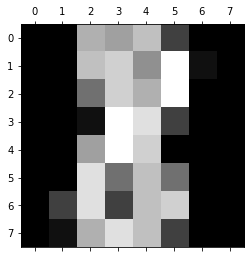

4


<Figure size 432x288 with 0 Axes>

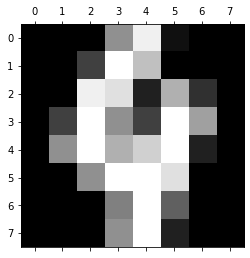

1


<Figure size 432x288 with 0 Axes>

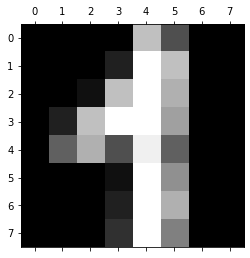

In [15]:
digits = load_digits()

for i in range(40, 43):
    print(digits.target[i])
    plt.gray()
    plt.matshow(digits.images[i])
    plt.show()

In [51]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lreg = LogisticRegression().fit(X_train, y_train)
score = lreg.score(X_test, y_test)
print(score)

0.9648148148148148


C:\Users\scarp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# This gives the highest accuracy
lreg = LogisticRegression(C=.5).fit(X_train, y_train)
score = lreg.score(X_test, y_test)
print(score)

0.9722222222222222


C:\Users\scarp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
lreg = LogisticRegression(C=.2).fit(X_train, y_train)
score = lreg.score(X_test, y_test)
print(score)

0.9722222222222222


C:\Users\scarp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
lreg = LogisticRegression(C=1.5).fit(X_train, y_train)
score = lreg.score(X_test, y_test)
print(score)

0.9648148148148148


C:\Users\scarp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
oneVsRest = OneVsRestClassifier(SVC()).fit(X_train, y_train)
score = oneVsRest.score(X_test, y_test)
print(score)

0.987037037037037


In [52]:
oneVsRest = OneVsRestClassifier(SVC(C = 0.5)).fit(X_train, y_train)
score = oneVsRest.score(X_test, y_test)
print(score)

0.9796296296296296


In [53]:
oneVsRest = OneVsRestClassifier(SVC(C = 1.5)).fit(X_train, y_train)
score = oneVsRest.score(X_test, y_test)
print(score)

0.9907407407407407


In [55]:
oneVsRest = OneVsRestClassifier(SVC(C = 2.0)).fit(X_train, y_train)
score = oneVsRest.score(X_test, y_test)
print(score)

0.9888888888888889


In [27]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [28]:
input_dim = 784
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)

X_train = X_train/255
X_test = X_test/255

In [29]:
# make dummies/one-hots for the classification
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1_l2
output_dim = 10 # number of classes
soft = Sequential() # Set up

soft.add(Dense(output_dim, input_dim=input_dim, activation='softmax',
        kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))

soft.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
soft.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))


Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 1.5410 - accuracy: 0.5090 - val_loss: 0.8806 - val_accuracy: 0.7106
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.8232 - accuracy: 0.7389 - val_loss: 0.7539 - val_accuracy: 0.7530
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7207 - accuracy: 0.7714 - val_loss: 0.6958 - val_accuracy: 0.7747
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6656 - accuracy: 0.7909 - val_loss: 0.6603 - val_accuracy: 0.7826
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.6349 - accuracy: 0.8001 - val_loss: 0.6384 - val_accuracy: 0.7922
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.6146 - accuracy: 0.8051 - val_loss: 0.6169 - val_accuracy: 0.7959
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5947 - accuracy: 0.8106 - val_loss: 0.6046 - val_accuracy: 0.8010
Epoch 

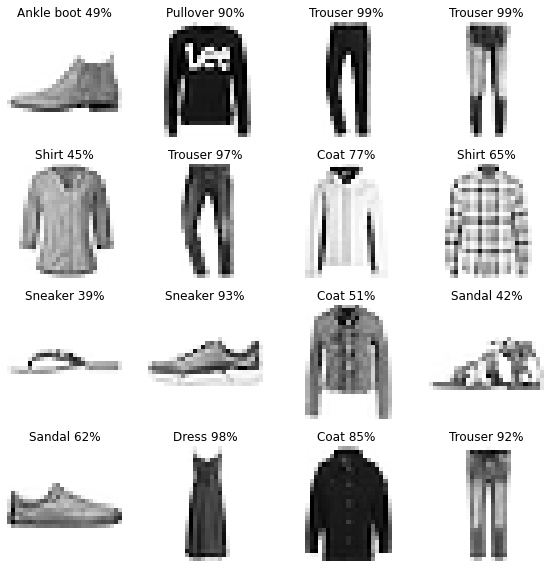

In [35]:
n = 16 # number of predictions to show
X_new = X_test[:n]
probs=soft.predict(X_new) #predicted probabilities
class_names = ['T-shirt/top','Trouser','Pullover',
'Dress','Coat','Sandal','Shirt',
'Sneaker','Bag','Ankle boot']
# Plot
cols = 4
rows = (len(X_new)+cols-1)//cols
plt.figure(figsize=(cols*2,rows*2))
X_new = X_new.reshape(n,28,28) #unflatten into images
for i,x in enumerate(X_new):
    ax = plt.subplot(rows,cols,i+1)
    ax.imshow(x, cmap='Greys')
    best_guess = np.argmax(probs[i])
    best_prob = int(probs[i][best_guess] * 100)
    ax.set_title(class_names[best_guess]+f' {best_prob}%')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [36]:
forest = sklearn.datasets.fetch_covtype()

In [42]:
from sklearn.preprocessing import MaxAbsScaler

In [61]:
X = forest.data
y = forest.target
print(X[5, :])
transformer = MaxAbsScaler().fit(X)
X = transformer.transform(X)
print(X[5, :])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lreg = LogisticRegression().fit(X_train, y_train)
score = lreg.score(X_test, y_test)
print(score)

[ 2.579e+03  1.320e+02  6.000e+00  3.000e+02 -1.500e+01  6.700e+01
  2.300e+02  2.370e+02  1.400e+02  6.031e+03  1.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  1.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
[ 0.66848108  0.36666667  0.09090909  0.21474588 -0.0249584   0.00941408
  0.90551181  0.93307087  0.5511811   0.84079186  1.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0

C:\Users\scarp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
lreg = LogisticRegression(C = 0.5).fit(X_train, y_train)
score = lreg.score(X_test, y_test)
print(score)

0.7104025151459519


C:\Users\scarp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
lreg = LogisticRegression(C = 1.5).fit(X_train, y_train)
score = lreg.score(X_test, y_test)
print(score)

0.7087674407930972


C:\Users\scarp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
lreg = LogisticRegression(solver = 'sag').fit(X_train, y_train)
score = lreg.score(X_test, y_test)
print(score)

0.720872728107215


In [47]:
lreg = LogisticRegression(solver = 'saga').fit(X_train, y_train)
score = lreg.score(X_test, y_test)
print(score)

0.720872728107215


In [50]:
lreg = LogisticRegression(penalty = 'l1',solver = 'saga').fit(X_train, y_train)
score = lreg.score(X_test, y_test)
print(score)

0.7234027905268955


C:\Users\scarp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [67]:
coeffs = lreg.coef_
print(coeffs.shape)
print(lreg.classes_)
for class_num in range(len(lreg.classes_)):
    weights = coeffs[class_num, :]
    sorted_w = sorted([(i, abs(weights[i])) for i in range(len(weights))], key = lambda x: x[1])
    print("Class" + str(class_num))
    print([s[0] for s in sorted_w if sorted_w.index(s) < 10])

(7, 54)
[1 2 3 4 5 6 7]
Class0
[28, 48, 51, 8, 21, 39, 52, 23, 26, 18]
Class1
[28, 19, 49, 31, 12, 22, 16, 21, 43, 51]
Class2
[20, 21, 50, 28, 8, 49, 22, 38, 31, 34]
Class3
[20, 21, 49, 50, 38, 22, 34, 5, 41, 40]
Class4
[28, 41, 20, 21, 23, 17, 49, 38, 47, 50]
Class5
[20, 21, 50, 22, 49, 47, 38, 31, 28, 1]
Class6
[28, 34, 20, 10, 21, 37, 1, 43, 22, 45]


In [76]:
feature_names = forest.feature_names
print(feature_names)

AttributeError: feature_names

TypeError: fetch_covtype() got an unexpected keyword argument 'as_frame'